In [5]:
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
import numpy as np


In [9]:
data = pd.read_csv("./iris.data.csv")

In [8]:
data

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
# 
data["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

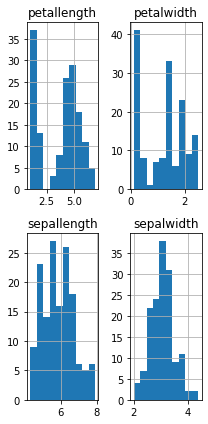

In [10]:
data.hist(figsize=(3,6))
plt.tight_layout()


In [6]:
# box plot using seaborn
snb.boxplot(x="sepal_lengtclassh", y="sepal_width", data= data)
plt.title("petal Distributuon of dataset")
plt.show()

NameError: name 'snb' is not defined

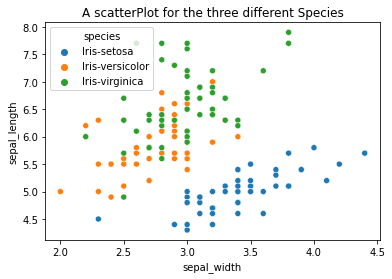

In [18]:
# scattered-plot
snb.scatterplot(x="sepal_width", y="sepal_length", hue="species", data = data)
plt.title("A scatterPlot for the three different Species")
plt.show()

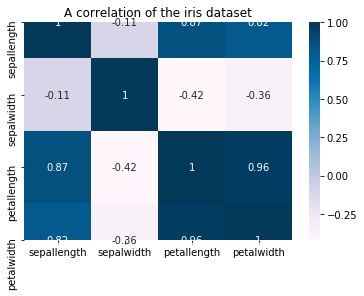

In [11]:
#correlation
snb.heatmap(data.corr(), annot=True, cmap="PuBu")
plt.title("A correlation of the iris dataset")
plt.show()

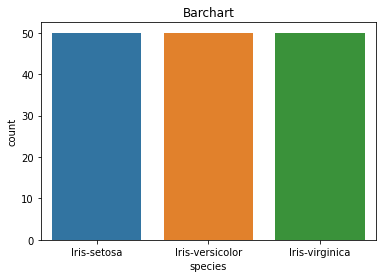

In [31]:
# bar chart
snb.countplot(x="species", data=data)
plt.title("Barchart")
plt.show()

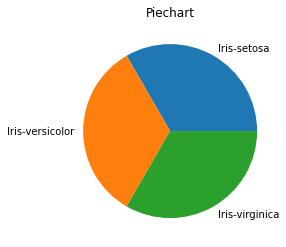

In [30]:
# pie chart
plt.pie(data["species"].value_counts(), labels=data["species"].unique())
plt.title("Piechart")
plt.show()

In [46]:
# importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
# for building the model
from sklearn.model_selection import train_test_split
# for preprocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
# for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report



In [7]:
data

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [32]:
#print the columns
data.columns

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class'], dtype='object')

In [47]:
# preprocessing stage
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X = data[['sepallength', 'sepalwidth', 'petallength', 'petalwidth']]
y = data['class']
encoder = encoder.fit_transform(data['class'])
encoder

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [55]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)
# display the size of the training
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [49]:
#normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
#X_train.shape(1, -1)
X_test = scaler.transform(X_test)


In [59]:
#building the model
decision_model = DecisionTreeClassifier() #initiate the model
decision_model.fit(X_train, y_train) #model fitting
y_predict_decision = decision_model.predict(X_test) #making prediction

In [60]:
#evaluation
accuracy = accuracy_score(y_test, y_predict_decision)
accuracy


1.0

In [65]:
#classification
from sklearn import metrics
print(metrics.classification_report(y_test, y_predict_decision))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
'''from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression'''

In [70]:
#initiate model
random_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
#linear_model = LinearRegression()

#fitting the models
random_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
#linear_model.fit(X_train, y_train)

#predict the models
y_pred_random = random_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
#y_pred_linear = linear_model.predict(X_test)


c:\Users\Yusuf\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [71]:
random_accuracy = accuracy_score(y_test, y_pred_random)
print("random_accuracy:")
print (random_accuracy)
print("*******")
knn_acc = accuracy_score(y_test, y_pred_knn)
print("knn_accuracy:")
print(knn_acc)
print("***********")
#linear_accuracy = accuracy_score(y_test, y_pred_linear)
#print(linear_accuracy)
print("*************")



random_accuracy:
1.0
*******
knn_accuracy:
1.0
***********
*************


In [64]:
%pip install ProfileReport

  Could not fetch URL https://pypi.org/simple/profilereport/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/profilereport/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1076)'))) - skipping
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1076)'))) - skipping
Note: you may need to restart the kernel to use updated packages.


  ERROR: Could not find a version that satisfies the requirement ProfileReport (from versions: none)
ERROR: No matching distribution found for ProfileReport


In [ ]:
#getting filereport
from pandas_profile import profileReport

profileReport(data)